In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 自訂損失函數
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target, r_pred_shue):
        mse_loss = nn.MSELoss()(output, target)
        mse_loss_r_pred_shue = nn.MSELoss()(output, r_pred_shue)
        final_loss = mse_loss + mse_loss_r_pred_shue
        return final_loss

C:\Users\User\AppData\Local\Temp\ipykernel_15996\2565778153.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [25]:
df = pd.read_csv('training_data.csv')
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491
...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632


In [26]:
def r0_shue(Bz, P):
    return (10.22 + 1.29*np.tanh(0.184*(Bz + 8.14)))*(P ** (-1/6.6))
            
def alpha_shue(Bz, P):
    return (0.58 - 0.007*Bz)*(1 + 0.024*np.log(P))

def r_shue(Bz, P, theta):
    return r0_shue(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_shue(Bz, P)))

df['r_pred_shue'] = r_shue(df['Bz'], df['Dp'], df['theta'])
df.dropna(inplace=True)
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,14.783529
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,14.040867
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,14.013234
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.826578
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,14.639468
...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,11.140273
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,11.069872
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.843820
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.835775


In [27]:
# from sklearn.model_selection import train_test_split

# df, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)
r_pred_shue = df['r_pred_shue'].values.reshape(-1, 1)

# 建立模型
model_pinn = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = CustomLoss()
optimizer = optim.RMSprop(model_pinn.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        batch_r_pred_shue = torch.tensor(r_pred_shue[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_pinn(batch_X)
        loss = criterion(output, batch_y_true, batch_r_pred_shue)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 4.9705
Epoch 2/100, Loss: 3.9765
Epoch 3/100, Loss: 3.1620
Epoch 4/100, Loss: 2.6740
Epoch 5/100, Loss: 2.6256
Epoch 6/100, Loss: 2.7935
Epoch 7/100, Loss: 2.8170
Epoch 8/100, Loss: 2.8498
Epoch 9/100, Loss: 2.8254
Epoch 10/100, Loss: 2.8227
Epoch 11/100, Loss: 2.7391
Epoch 12/100, Loss: 2.7460
Epoch 13/100, Loss: 2.7688
Epoch 14/100, Loss: 2.8046
Epoch 15/100, Loss: 2.6636
Epoch 16/100, Loss: 2.6911
Epoch 17/100, Loss: 2.6986
Epoch 18/100, Loss: 2.7024
Epoch 19/100, Loss: 2.6945
Epoch 20/100, Loss: 2.6920
Epoch 21/100, Loss: 2.6584
Epoch 22/100, Loss: 2.5767
Epoch 23/100, Loss: 2.6507
Epoch 24/100, Loss: 2.6446
Epoch 25/100, Loss: 2.6996
Epoch 26/100, Loss: 2.6226
Epoch 27/100, Loss: 2.5988
Epoch 28/100, Loss: 2.6060
Epoch 29/100, Loss: 2.6598
Epoch 30/100, Loss: 2.6400
Epoch 31/100, Loss: 2.6072
Epoch 32/100, Loss: 2.6251
Epoch 33/100, Loss: 2.5810
Epoch 34/100, Loss: 2.6293
Epoch 35/100, Loss: 2.6332
Epoch 36/100, Loss: 2.6338
Epoch 37/100, Loss: 2.5987
Epoch 38/1

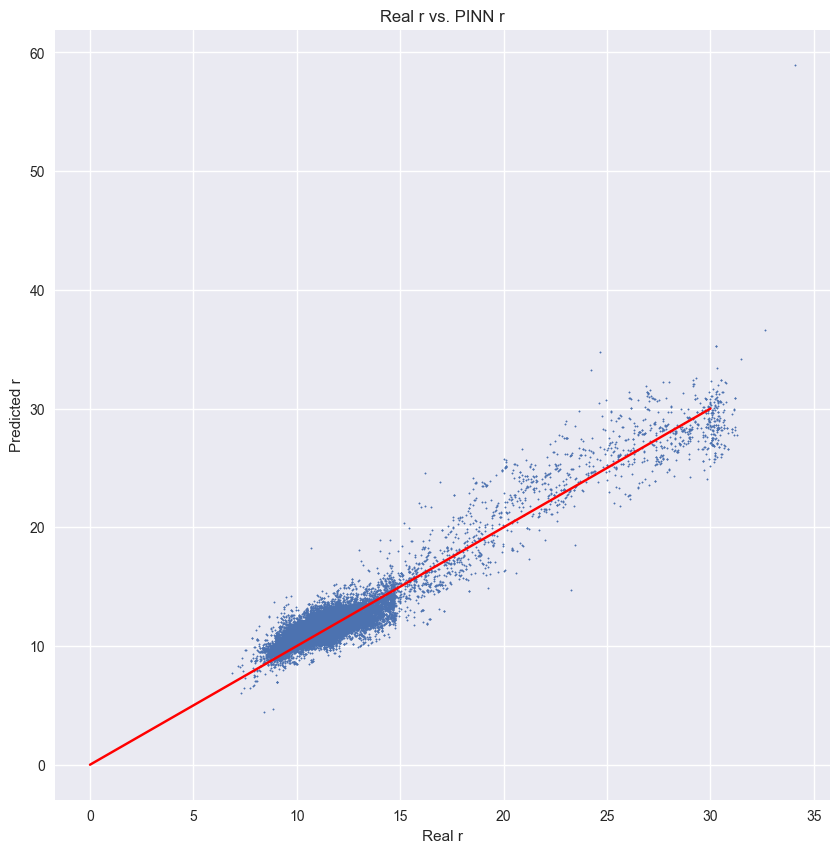

In [29]:
y_pred_pinn = model_pinn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(y_true, y_pred_pinn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.title('Real r vs. PINN r')
plt.show()

In [30]:
df['r_pinn'] = y_pred_pinn
# calculate the MSE of r_pred_shue and nn_pred
from sklearn.metrics import mean_squared_error
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df['r'], df['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_pinn'])))

RMSE of r_pred_shue:  1.2232088873921392
RMSE of pinn_pred:  0.9353991651606814


In [31]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)


# 建立模型
model_nn = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn(batch_X)
        loss = criterion(output, batch_y_true)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 3.1866
Epoch 2/100, Loss: 2.0994
Epoch 3/100, Loss: 1.6801
Epoch 4/100, Loss: 1.4117
Epoch 5/100, Loss: 1.3090
Epoch 6/100, Loss: 1.2881
Epoch 7/100, Loss: 1.3536
Epoch 8/100, Loss: 1.4093
Epoch 9/100, Loss: 1.4879
Epoch 10/100, Loss: 1.5324
Epoch 11/100, Loss: 1.5993
Epoch 12/100, Loss: 1.6175
Epoch 13/100, Loss: 1.6433
Epoch 14/100, Loss: 1.6865
Epoch 15/100, Loss: 1.7680
Epoch 16/100, Loss: 1.7483
Epoch 17/100, Loss: 1.7466
Epoch 18/100, Loss: 1.8453
Epoch 19/100, Loss: 1.8457
Epoch 20/100, Loss: 1.7364
Epoch 21/100, Loss: 1.8184
Epoch 22/100, Loss: 1.8001
Epoch 23/100, Loss: 1.7598
Epoch 24/100, Loss: 1.7999
Epoch 25/100, Loss: 1.8144
Epoch 26/100, Loss: 1.8555
Epoch 27/100, Loss: 1.8208
Epoch 28/100, Loss: 1.8435
Epoch 29/100, Loss: 1.8233
Epoch 30/100, Loss: 1.8192
Epoch 31/100, Loss: 1.7510
Epoch 32/100, Loss: 1.8445
Epoch 33/100, Loss: 1.8598
Epoch 34/100, Loss: 1.8690
Epoch 35/100, Loss: 1.8163
Epoch 36/100, Loss: 1.8656
Epoch 37/100, Loss: 1.8595
Epoch 38/1

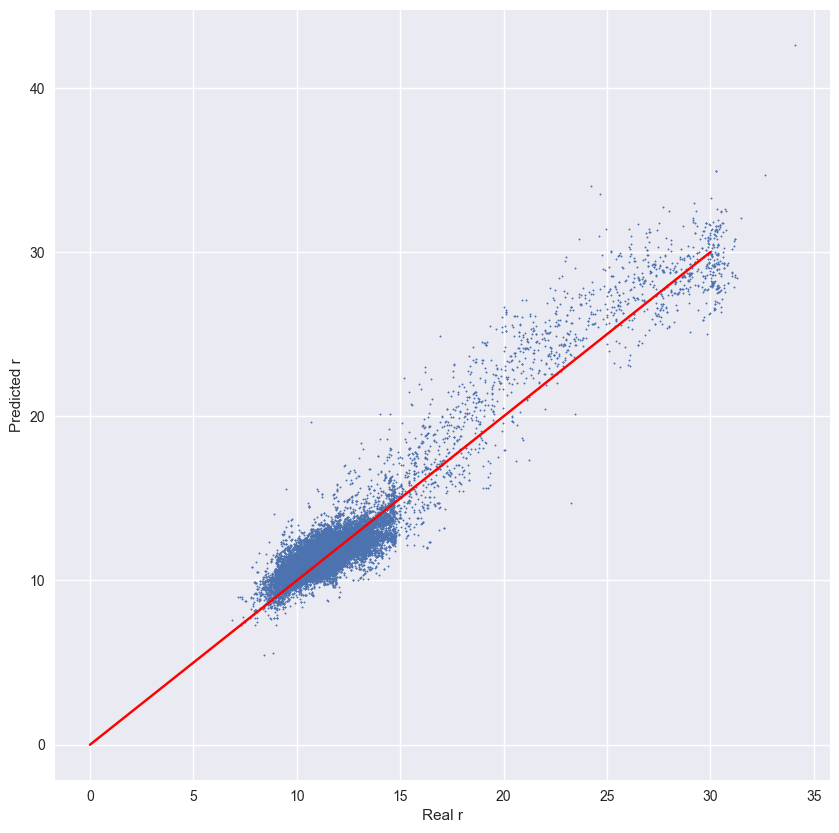

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue,r_pinn,r_nn
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,14.783529,14.908219,14.299624
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,14.040867,14.210992,13.809196
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,14.013234,14.210560,13.796668
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.826578,13.960508,13.675267
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,14.639468,14.709819,14.126319
...,...,...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,11.140273,10.973915,11.134667
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,11.069872,10.852934,10.984724
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.843820,11.915915,11.929308
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.835775,11.911430,11.925072


In [32]:
y_pred_nn = model_nn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(y_true, y_pred_nn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

df['r_nn'] = y_pred_nn
df

In [38]:
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df['r'], df['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_nn'])))



RMSE of r_pred_shue:  1.2232088873921392
RMSE of pinn_pred:  0.9353991651606814
RMSE of nn_pred:  0.9478133032219155


In [34]:
# make a 2D plane of pinn_pred for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0.5, 40, 100)

Bz, P = np.meshgrid(Bz, P)
theta = np.zeros((100, 100))

# Bz, P, theta should be tensors
Bz = torch.tensor(Bz).float()
P = torch.tensor(P).float()
theta = torch.tensor(theta).float()

# predict r from Bz, P, theta
r_pred_pinn_list = []
for i in range(100):
    for j in range(100):
        r_pred_pinn_list.append(model_pinn(torch.tensor([Bz[i][j], P[i][j], theta[i][j]]).float()).detach().numpy())
        
r_pred_pinn = np.array(r_pred_pinn_list).reshape(100, 100)
r_pred_pinn.shape

(100, 100)

C:\Users\User\AppData\Local\Temp\ipykernel_15996\1064598893.py:2: RuntimeWarning: divide by zero encountered in power
  return (10.22 + 1.29*np.tanh(0.184*(Bz + 8.14)))*(P ** (-1/6.6))
C:\Users\User\AppData\Local\Temp\ipykernel_15996\1064598893.py:5: RuntimeWarning: divide by zero encountered in log
  return (0.58 - 0.007*Bz)*(1 + 0.024*np.log(P))


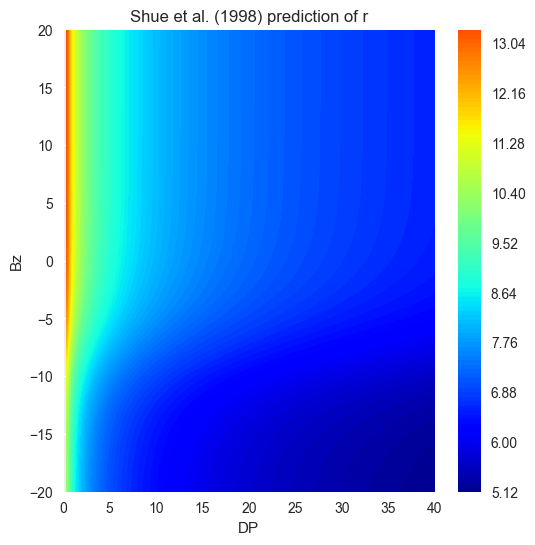

In [35]:
# make a 2D plane of r_pred_shue for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0, 40, 100)

Bz, P = np.meshgrid(Bz, P)

r_pred_shue_list = r_shue(Bz, P, 0)
r_pred_shue_list.shape

plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_shue_list, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('Shue et al. (1998) prediction of r')
plt.show()

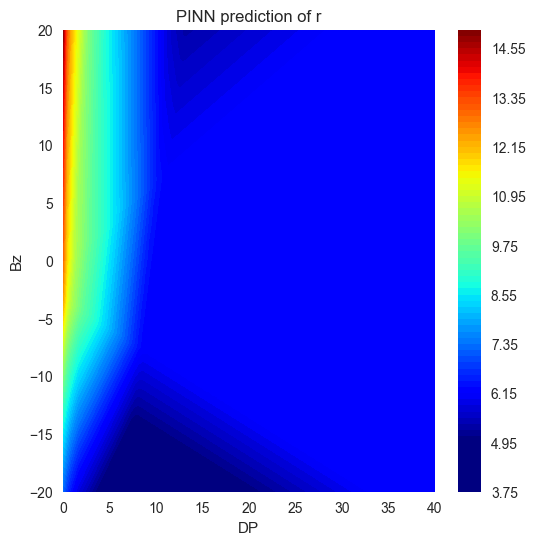

In [36]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_pinn, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('PINN prediction of r')
plt.show()

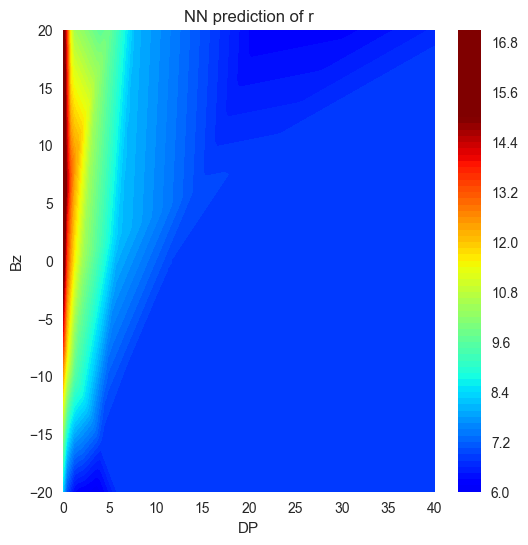

In [37]:
# make a 2D plane of pinn_pred for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0, 40, 100)

Bz, P = np.meshgrid(Bz, P)
theta = np.zeros((100, 100))

# Bz, P, theta should be tensors
Bz = torch.tensor(Bz).float()
P = torch.tensor(P).float()
theta = torch.tensor(theta).float()

# predict r from Bz, P, theta
r_pred_nn_list = []
for i in range(100):
    for j in range(100):
        r_pred_nn_list.append(model_nn(torch.tensor([Bz[i][j], P[i][j], theta[i][j]]).float()).detach().numpy())
        
r_pred_nn = np.array(r_pred_nn_list).reshape(100, 100)
r_pred_nn.shape

plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_nn, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('NN prediction of r')
plt.show()

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 自訂損失函數
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target, r_pred_shue):
        mse_loss = nn.MSELoss()(output, target)
        mse_loss_r_pred_shue = nn.MSELoss()(output, r_pred_shue)
        final_loss = mse_loss + mse_loss_r_pred_shue
        return final_loss

C:\Users\User\AppData\Local\Temp\ipykernel_22888\2565778153.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [40]:
df = pd.read_csv('training_data.csv')
def r0_shue(Bz, P):
    return (10.22 + 1.29*np.tanh(0.184*(Bz + 8.14)))*(P ** (-1/6.6))
            
def alpha_shue(Bz, P):
    return (0.58 - 0.007*Bz)*(1 + 0.024*np.log(P))

def r_shue(Bz, P, theta):
    return r0_shue(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_shue(Bz, P)))

df['r_pred_shue'] = r_shue(df['Bz'], df['Dp'], df['theta'])
df.dropna(inplace=True)
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,14.783529
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,14.040867
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,14.013234
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.826578
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,14.639468
...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,11.140273
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,11.069872
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.843820
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.835775


In [41]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df, test_size=0.8, shuffle=True)

In [42]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)
r_pred_shue = df['r_pred_shue'].values.reshape(-1, 1)

# 建立模型
model_pinn = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# 定義損失函數和優化器
criterion = CustomLoss()
optimizer = optim.RMSprop(model_pinn.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        batch_r_pred_shue = torch.tensor(r_pred_shue[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_pinn(batch_X)
        loss = criterion(output, batch_y_true, batch_r_pred_shue)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 1.0153
Epoch 2/100, Loss: 1.2276
Epoch 3/100, Loss: 1.0345
Epoch 4/100, Loss: 0.9199
Epoch 5/100, Loss: 0.9097
Epoch 6/100, Loss: 0.7999
Epoch 7/100, Loss: 0.7075
Epoch 8/100, Loss: 0.6333
Epoch 9/100, Loss: 0.6550
Epoch 10/100, Loss: 0.5664
Epoch 11/100, Loss: 0.5352
Epoch 12/100, Loss: 0.5009
Epoch 13/100, Loss: 0.4963
Epoch 14/100, Loss: 0.4972
Epoch 15/100, Loss: 0.4856
Epoch 16/100, Loss: 0.4725
Epoch 17/100, Loss: 0.4918
Epoch 18/100, Loss: 0.4614
Epoch 19/100, Loss: 0.4685
Epoch 20/100, Loss: 0.4796
Epoch 21/100, Loss: 0.4744
Epoch 22/100, Loss: 0.4999
Epoch 23/100, Loss: 0.4865
Epoch 24/100, Loss: 0.5037
Epoch 25/100, Loss: 0.4922
Epoch 26/100, Loss: 0.4845
Epoch 27/100, Loss: 0.4943
Epoch 28/100, Loss: 0.5024
Epoch 29/100, Loss: 0.5000
Epoch 30/100, Loss: 0.4876
Epoch 31/100, Loss: 0.4778
Epoch 32/100, Loss: 0.4821
Epoch 33/100, Loss: 0.4956
Epoch 34/100, Loss: 0.4993
Epoch 35/100, Loss: 0.4992
Epoch 36/100, Loss: 0.4989
Epoch 37/100, Loss: 0.4835
Epoch 38/1

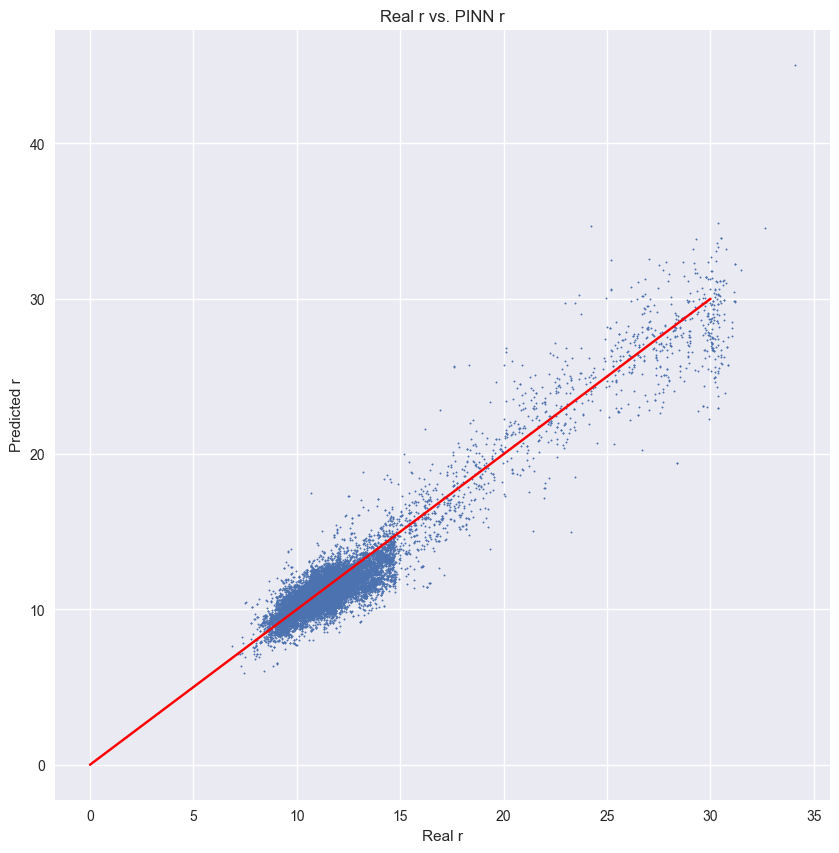

In [43]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_pinn = model_pinn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_pinn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.title('Real r vs. PINN r')
plt.show()

In [44]:
df_test['r_pinn'] = y_pred_pinn
# calculate the MSE of r_pred_shue and nn_pred
from sklearn.metrics import mean_squared_error
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))

RMSE of r_pred_shue:  1.2687376095455556
RMSE of pinn_pred:  0.9407500783517158


In [45]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)


# 建立模型
model_nn = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn(batch_X)
        loss = criterion(output, batch_y_true)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.7589
Epoch 2/100, Loss: 0.7266
Epoch 3/100, Loss: 0.6284
Epoch 4/100, Loss: 0.5863
Epoch 5/100, Loss: 0.5826
Epoch 6/100, Loss: 0.5595
Epoch 7/100, Loss: 0.5205
Epoch 8/100, Loss: 0.4943
Epoch 9/100, Loss: 0.4913
Epoch 10/100, Loss: 0.5149
Epoch 11/100, Loss: 0.5010
Epoch 12/100, Loss: 0.5171
Epoch 13/100, Loss: 0.5347
Epoch 14/100, Loss: 0.5702
Epoch 15/100, Loss: 0.5592
Epoch 16/100, Loss: 0.5514
Epoch 17/100, Loss: 0.5505
Epoch 18/100, Loss: 0.5239
Epoch 19/100, Loss: 0.4760
Epoch 20/100, Loss: 0.4733
Epoch 21/100, Loss: 0.4610
Epoch 22/100, Loss: 0.4463
Epoch 23/100, Loss: 0.4241
Epoch 24/100, Loss: 0.3981
Epoch 25/100, Loss: 0.4109
Epoch 26/100, Loss: 0.4096
Epoch 27/100, Loss: 0.4089
Epoch 28/100, Loss: 0.4042
Epoch 29/100, Loss: 0.3968
Epoch 30/100, Loss: 0.4100
Epoch 31/100, Loss: 0.4159
Epoch 32/100, Loss: 0.4187
Epoch 33/100, Loss: 0.4107
Epoch 34/100, Loss: 0.3968
Epoch 35/100, Loss: 0.4086
Epoch 36/100, Loss: 0.4018
Epoch 37/100, Loss: 0.4051
Epoch 38/1

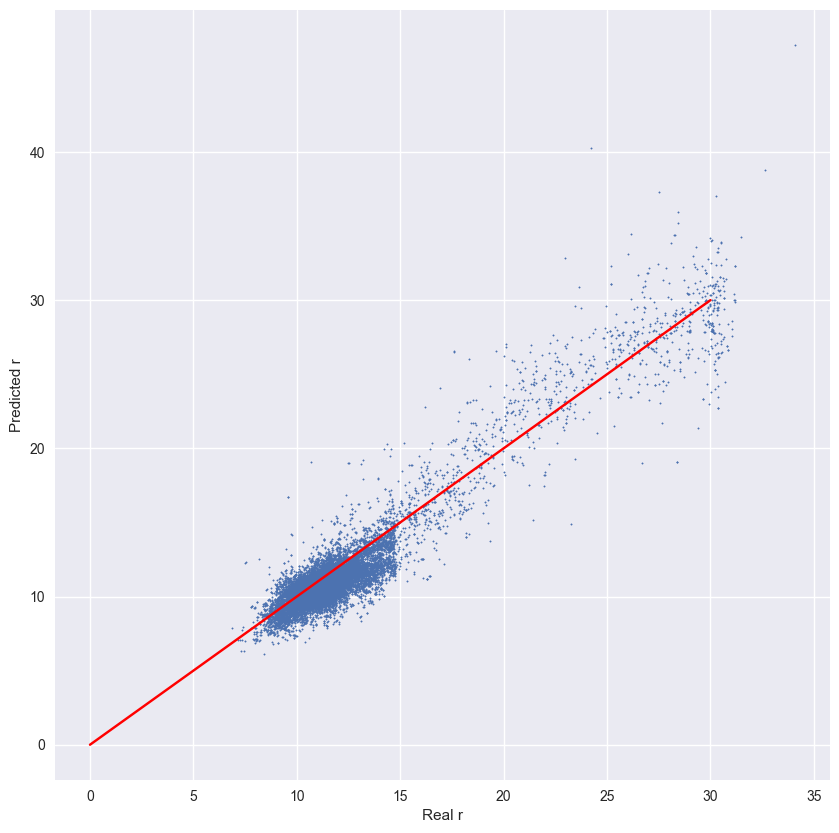

In [46]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_nn = model_nn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_nn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

df_test['r_nn'] = y_pred_nn

In [47]:
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn'])))

RMSE of r_pred_shue:  1.2687376095455556
RMSE of pinn_pred:  0.9407500783517158
RMSE of nn_pred:  1.1047559836021323
